In [1]:
#How effective is the campaign in converting impressions into clicks and clicks into sales,
#as demonstrated by CTR (Click Through Rate) and conversion rate?
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Read data
df = pd.read_csv('D:\IIT G Data Analytics Program\Hackathon\Data\File\KAG_conversion_data_raw.csv')

print("Dataset shape:", df.shape)
print("\Column names:")
print(df.columns.tolist())

Dataset shape: (1143, 11)
\Column names:
['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender', 'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion']


In [5]:
#Overrall metrics

total_impr = df['Impressions'].sum()
total_clicks = df['Clicks'].sum()
total_acq = df['Approved_Conversion'].sum()

overall_ctr = total_clicks / total_impr if total_impr > 0 else 0.0
overall_cvrt = total_acq / total_clicks if total_clicks > 0 else 0.0

print(overall_ctr)
print(overall_cvrt)

0.00017881336592357833
0.028271976942224553


In [6]:
# Age × gender rollup

agg = df.groupby(['age','gender'], as_index=False).agg(Impressions=('Impressions','sum'),Clicks=('Clicks','sum'),
    Approved_Conversion=('Approved_Conversion','sum')
)
agg['CTR'] = np.where(agg['Impressions'] > 0, agg['Clicks'] / agg['Impressions'], 0.0)
agg['ConversionRate'] = np.where(agg['Clicks'] > 0, agg['Approved_Conversion'] / agg['Clicks'], 0.0)

print(agg.head())

     age gender  Impressions  Clicks  Approved_Conversion       CTR  \
0  30-34      F     31571576    5099                  195  0.000162   
1  30-34      M     36421443    4384                  299  0.000120   
2  35-39      F     21439505    4161                   95  0.000194   
3  35-39      M     20665139    2933                  112  0.000142   
4  40-44      F     23396175    5177                   93  0.000221   

   ConversionRate  
0        0.038243  
1        0.068203  
2        0.022831  
3        0.038186  
4        0.017964  


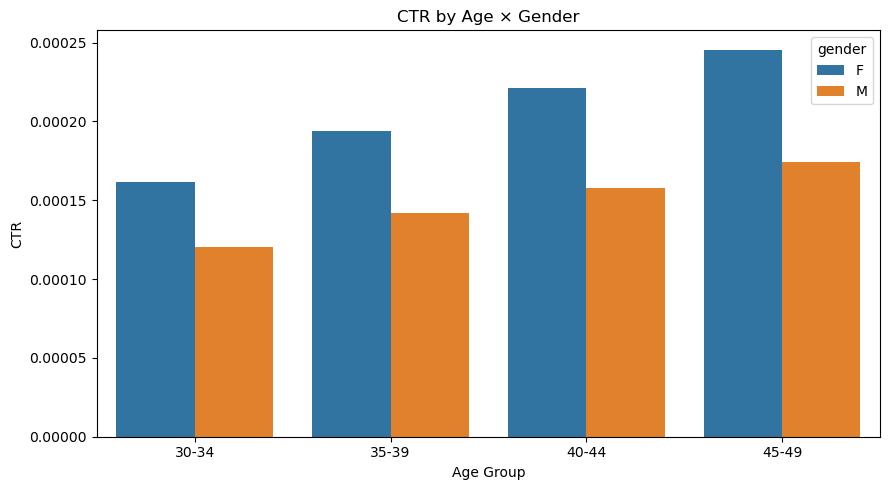

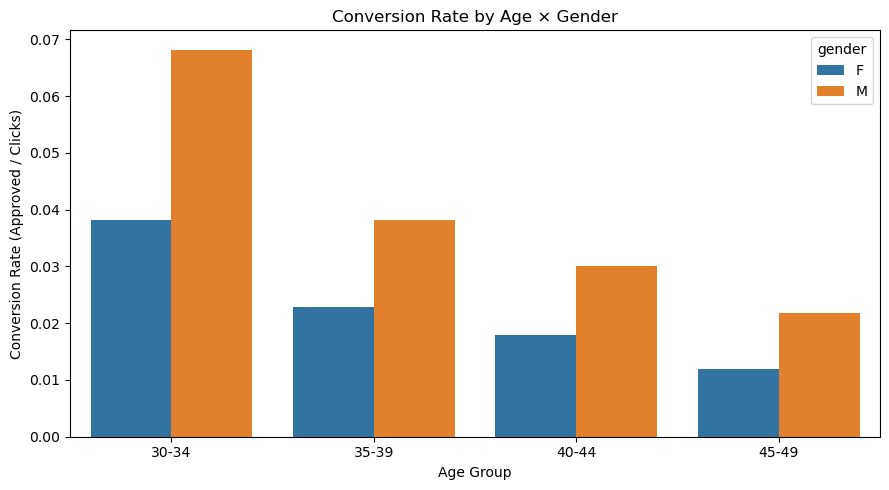

Computed overall and segment CTR/Conversion Rate and plotted segment charts


In [8]:
#Visuals: CTR and Conversion Rate by age × gender

plt.figure(figsize=(9,5))
sns.barplot(data=agg, x='age', y='CTR', hue='gender')
plt.title('CTR by Age × Gender')
plt.ylabel('CTR')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,5))
sns.barplot(data=agg, x='age', y='ConversionRate', hue='gender')
plt.title('Conversion Rate by Age × Gender')
plt.ylabel('Conversion Rate (Approved / Clicks)')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()

print('Computed overall and segment CTR/Conversion Rate and plotted segment charts')